# 차원 축소와 군집화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load
실습에서 사용할 데이터는 손글씨 데이터  
데이터는 `sklearn.datasets`의 `load_digits`를 이용해 받을 수 있음  


In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]

In [4]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

### 1.2 데이터 정규화
데이터 크기에 형향을 받는 PCA를 위해서 데이터를 정규화

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaled_data = scaler.fit_transform(data)

### 1.3 시각화
TSNE를 이용해 시각화 데이터를 생성

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [8]:
tsne_latent = tsne.fit_transform(scaled_data)

In [11]:
def visualize_latent_space_with_label(latent, pred):
  for label in np.unique(pred):
    index = pred == label
    component_1 = latent[index, 0]
    component_2 = latent[index, 1]
    plt.scatter(component_1, component_2, c=f"C{label}", label=label)
  plt.legend()

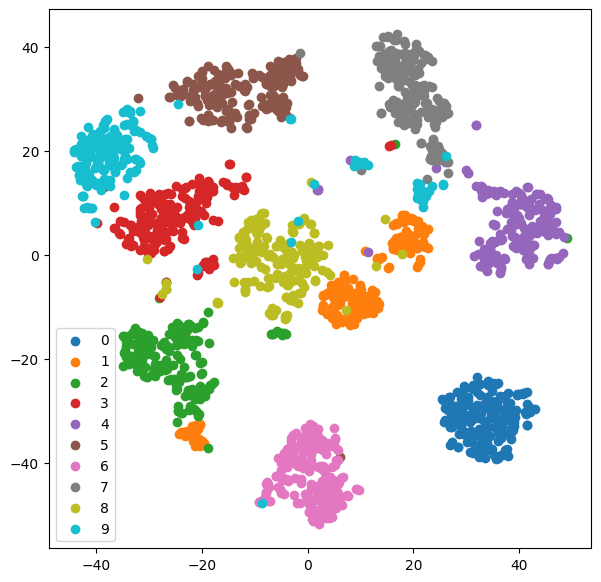

In [12]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, target)

## 2. Clustering
데이터에 다른 처리 없이 Kmeans로 군집화 처리  
k means의 k는 정답을 알고 있는 상태느 10을 주어 실제로 잘 군집이 되는 지 확인

### 2.1 학습

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

In [14]:
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

### 2.2 예측

In [15]:
pred = kmeans.predict(scaled_data)

### 2.3 시각화

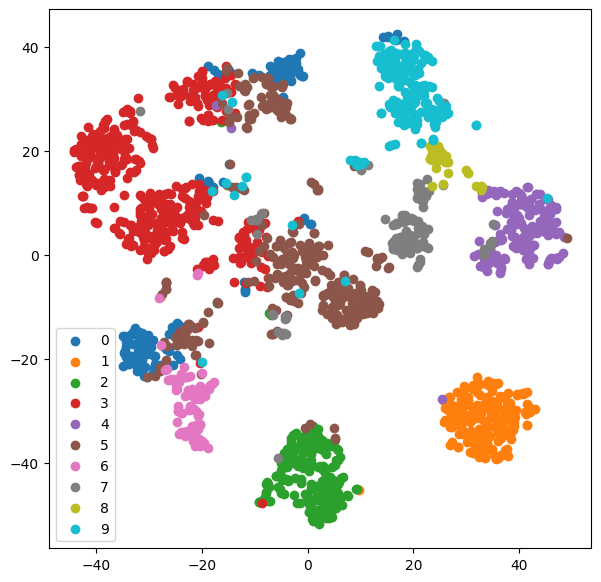

In [16]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pred)

## PCA & Clustering  
차원을 축소한 후 군집화를 진행해보기

### 3.1 PCA 데이터 생성  
차원을 축소시킨 데이터를 생성

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(scaled_data)

PCA(n_components=12)

In [18]:
pca_data = pca.transform(scaled_data)

### 3.2 K Means 학습

In [19]:
pca_kmeans = KMeans(n_clusters=10)
pca_kmeans.fit(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

### 3.3 예측

In [20]:
pca_pred = pca_kmeans.predict(pca_data)

### 3.4 시각화

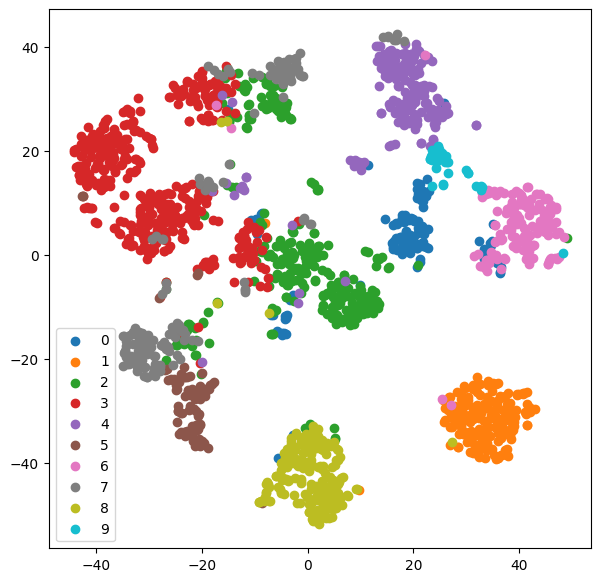

In [21]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pca_pred)

## 4. 마무리

Text(0.5, 1.0, 'PCA Clustering')

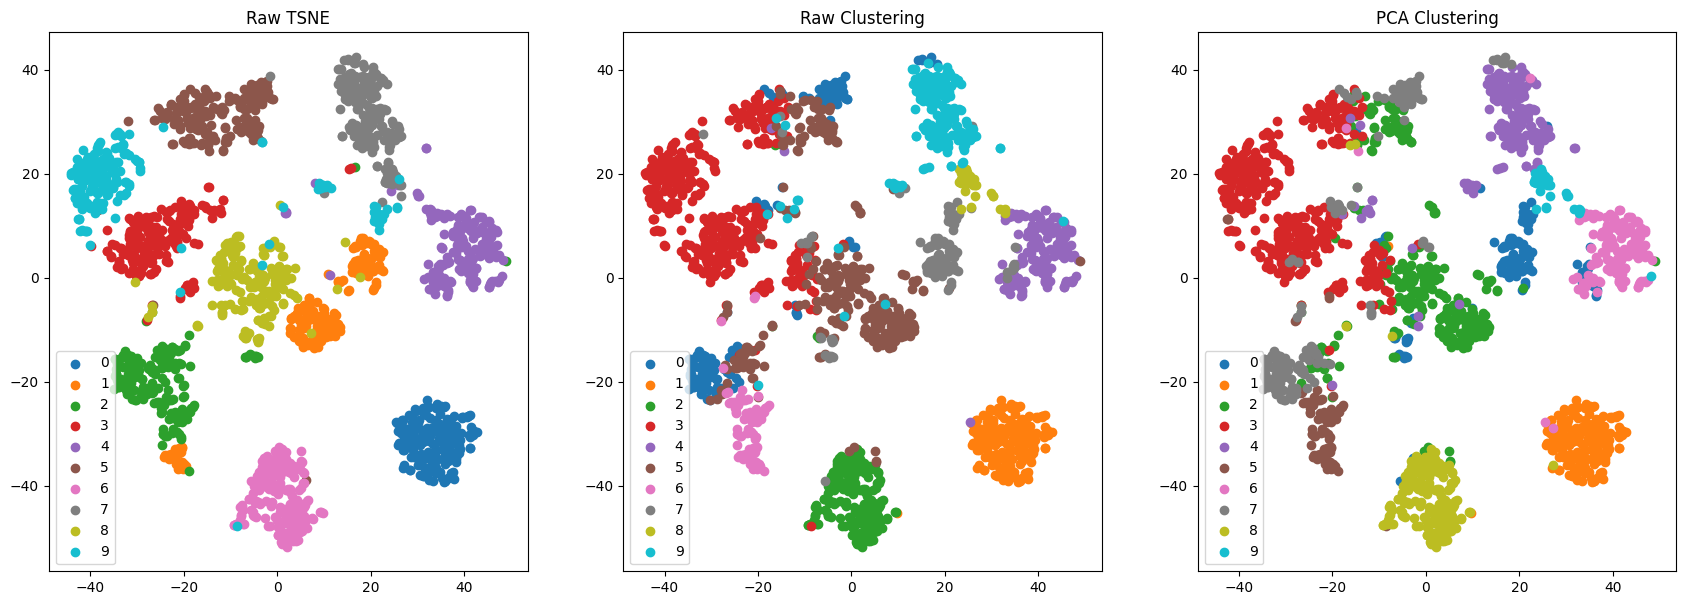

In [23]:
plt.figure(figsize=(21, 7))
plt.subplot(131)
visualize_latent_space_with_label(tsne_latent, target)
plt.title("Raw TSNE")
plt.subplot(132)
visualize_latent_space_with_label(tsne_latent, pred)
plt.title("Raw Clustering")
plt.subplot(133)
visualize_latent_space_with_label(tsne_latent, pca_pred)
plt.title("PCA Clustering")

pca를 진행하면 축소된 차원에서도 비슷한 결과를 얻을 수 있음

In [25]:
scaled_data.shape

(1797, 64)

In [26]:
pca_data.shape

(1797, 12)